### Import all the necessary modules

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt          
import datetime as dt 
import scipy.stats as stats
import statsmodels.formula.api as smf

### Import the dataset in the Jupyter Notebook

In [5]:
Claims = pd.read_csv('claims (1).csv')

In [6]:
Claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [7]:
Claims.shape

(1100, 10)

**There are 1100 rows and 10 variables in our DataFrame.**

In [8]:
Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


**We need to convert the claim amount datatype from an object to a numerical format. So that we can continue with the further procedure.**

In [9]:
Claims.claim_date

0       11/27/2017
1       10/03/2018
2       02/02/2018
3       06/17/2018
4       01/13/2018
           ...    
1095    06/11/2017
1096    03/14/2018
1097    02/09/2018
1098    03/21/2018
1099    06/04/2017
Name: claim_date, Length: 1100, dtype: object

**Checking if the Values of claim_date variable is in the correct Date format.**

In [10]:
Claims['claim_amount']= Claims['claim_amount'].str.replace('$','').astype('float')

In [11]:
Claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No


**Converted the claim_amount datatype to numerical.**

In [12]:
Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   float64
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 86.1+ KB


In [13]:
Claims.claim_amount.min()

1000.0

In [14]:
Claims.claim_amount.max()

48150.5

In [15]:
Claim_binned = pd.Series(pd.cut(Claims.claim_amount, range(0, 50000, 10000)))

In [16]:
Claim_binned

0           (0, 10000]
1           (0, 10000]
2           (0, 10000]
3           (0, 10000]
4           (0, 10000]
             ...      
1095        (0, 10000]
1096        (0, 10000]
1097    (20000, 30000]
1098    (20000, 30000]
1099    (30000, 40000]
Name: claim_amount, Length: 1100, dtype: category
Categories (4, interval[int64, right]): [(0, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000]]

In [17]:
Claims['Claim_binned'] = Claim_binned

In [18]:
Claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Claim_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]"


In [19]:
Claims_1 = Claims.copy()

**Making the copy of the DataFrame so we don't lose any of the data.**

In [20]:
Claims_1['Claim_group'] = np.where(Claims_1.claim_amount<=10000, "Very Low",
                                   np.where(Claims_1.claim_amount<=20000, "Low",
                                            np.where(Claims_1.claim_amount<=30000, "Medium",
                                                     np.where(Claims_1.claim_amount<=40000, "High", "very High"))))

In [21]:
Claims_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Claim_binned,Claim_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",Very Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",Very Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",Very Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",Very Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",Very Low


In [22]:
Claims.total_policy_claims.min()

1.0

In [23]:
Claims.total_policy_claims.max()

8.0

**Here we need to check the minimum and maximum values of claim_amount and total_policy_claims. So that we can convert these variables to categorical variable by binning.**

In [24]:
Claims_1['total_policy_group'] = np.where(Claims_1.total_policy_claims<=3, "Low",
                                   np.where(Claims_1.total_policy_claims<=6, "Medium", "High"))

In [25]:
Claims_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Claim_binned,Claim_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",Very Low,Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",Very Low,Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",Very Low,Low


**Now we have converted the claim_amount and total_policy_claim datatype to categorical variables.**

In [26]:
Claims_1_Copy = Claims_1.copy()

In [27]:
Claims_1_Copy.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Claim_binned,Claim_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",Very Low,Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",Very Low,Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",Very Low,Low


In [28]:
Claims_1 = Claims_1.drop(columns = ['total_policy_claims', 'claim_amount'])

In [29]:
Claims_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,Claim_binned,Claim_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,No,"(0, 10000]",Very Low,Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,No,"(0, 10000]",Very Low,Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,Yes,"(0, 10000]",Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,No,"(0, 10000]",Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,No,"(0, 10000]",Very Low,Low


**As we have converted the datatypes of the two variables and created new columns so now we can drop the old columns.**

In [30]:
Claims_1_Copy.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Claim_binned,Claim_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,"(0, 10000]",Very Low,Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,"(0, 10000]",Very Low,Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,"(0, 10000]",Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,"(0, 10000]",Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,"(0, 10000]",Very Low,Low


In [31]:
Claims_1 = Claims_1.drop(columns = ['Claim_binned'])

In [32]:
Claims_1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,Claim_group,total_policy_group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,No,Very Low,Low
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,No,Very Low,Low
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,Yes,Very Low,Low
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,No,Very Low,Low
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,No,Very Low,Low


In [33]:
Claims_1 = Claims_1.drop(columns = ['claim_date'])

In [34]:
Claims_1 = Claims_1.drop(columns = ['claim_id', 'customer_id'])

**We can also drop the irrelevant columns like claim_date, claim_id and customer_id from the DataFrame as these variables does not give that much impact to our model.**

In [35]:
Claims_1.head()

,incident_cause,claim_area,police_report,claim_type,fraudulent,Claim_group,total_policy_group
0,Driver error,Auto,No,Material only,No,Very Low,Low
1,Crime,Home,Unknown,Material only,No,Very Low,Low
2,Other driver error,Auto,No,Material only,Yes,Very Low,Low
3,Natural causes,Auto,No,Material only,No,Very Low,Low
4,Crime,Auto,No,Material only,No,Very Low,Low


In [36]:
Claims['fraudulent'] = np.where(Claims['fraudulent'] == 'No',0,1)

In [37]:
Claims_1['fraudulent'] = np.where(Claims_1['fraudulent'] == 'No',0,1)

**We can also convert the fraudulent variable to categorical datatype.**

In [38]:
Claims_1.head()

,incident_cause,claim_area,police_report,claim_type,fraudulent,Claim_group,total_policy_group
0,Driver error,Auto,No,Material only,0,Very Low,Low
1,Crime,Home,Unknown,Material only,0,Very Low,Low
2,Other driver error,Auto,No,Material only,1,Very Low,Low
3,Natural causes,Auto,No,Material only,0,Very Low,Low
4,Crime,Auto,No,Material only,0,Very Low,Low


In [39]:
Claims_1.isna().sum()

incident_cause        0
claim_area            0
police_report         0
claim_type            0
fraudulent            0
Claim_group           0
total_policy_group    0
dtype: int64

**There are no missing values in the data.**

<Axes: xlabel='fraudulent'>

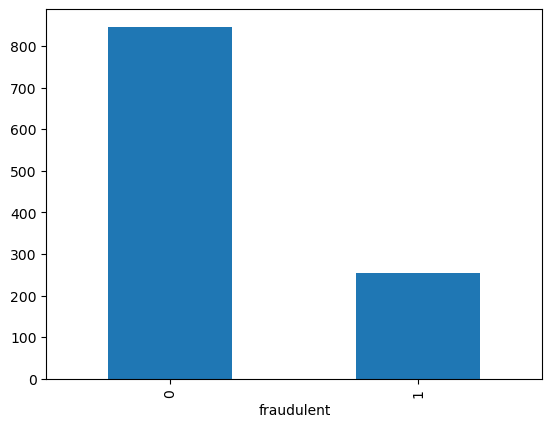

In [40]:
Claims_1.fraudulent.value_counts().plot(kind='bar')

**So by seeing this bar chart we can say that the number of Normal Customers are more than the fraud customers.**

In [41]:
Claims_1.head(10)

,incident_cause,claim_area,police_report,claim_type,fraudulent,Claim_group,total_policy_group
0,Driver error,Auto,No,Material only,0,Very Low,Low
1,Crime,Home,Unknown,Material only,0,Very Low,Low
2,Other driver error,Auto,No,Material only,1,Very Low,Low
3,Natural causes,Auto,No,Material only,0,Very Low,Low
4,Crime,Auto,No,Material only,0,Very Low,Low
5,Other driver error,Auto,No,Injury only,1,High,Low
6,Driver error,Auto,No,Material only,0,Very Low,Medium
7,Natural causes,Auto,No,Material only,0,Very Low,Low
8,Crime,Auto,Unknown,Material only,0,Very Low,Low
9,Crime,Auto,No,Material only,1,Very Low,Low


## Use one-hot encoding to convert the variables into numerical columns

In [42]:
Claims_1.columns

Index(['incident_cause', 'claim_area', 'police_report', 'claim_type',
       'fraudulent', 'Claim_group', 'total_policy_group'],
      dtype='object')

In [43]:
Claims_1 = pd.get_dummies(Claims_1, columns = ['incident_cause', 'claim_area', 'police_report', 'claim_type','Claim_group', 'total_policy_group'], dtype = int)

In [44]:
Claims_1.head(10)

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,claim_type_Material and injury,claim_type_Material only,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very Low,Claim_group_very High,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium
0,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,1,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
7,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
8,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
9,1,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


**As we have all the categorical variable in our DataFrame so we can do One-hot Encoding and convert all the categorical variables to numerical to build the model.**

In [45]:
Claims_1.shape

(1100, 22)

In [46]:
Claims.shape

(1100, 11)

In [47]:
Claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Claim_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,0,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,0,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,1,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,0,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,0,"(0, 10000]"


In [48]:
Claims_1['claim_amount'] = Claims['claim_amount']
Claims_1['total_policy_claims'] = Claims['total_policy_claims']

**Earlier we have dropped the claim_amount and total_policy_claims variables but again added because these two variable give a lot of impact to our model.**

In [49]:
Claims_1.head(10)

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very Low,Claim_group_very High,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2680.0,1.0
5,1,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,38306.5,3.0
6,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,1730.0,4.0
7,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1160.0,3.0
8,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,2620.0,1.0
9,1,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2748.5,2.0


In [50]:
Claims_1.isna().sum()

fraudulent                            0
incident_cause_Crime                  0
incident_cause_Driver error           0
incident_cause_Natural causes         0
incident_cause_Other causes           0
incident_cause_Other driver error     0
claim_area_Auto                       0
claim_area_Home                       0
police_report_No                      0
police_report_Unknown                 0
police_report_Yes                     0
claim_type_Injury only                0
claim_type_Material and injury        0
claim_type_Material only              0
Claim_group_High                      0
Claim_group_Low                       0
Claim_group_Medium                    0
Claim_group_Very Low                  0
Claim_group_very High                 0
total_policy_group_High               0
total_policy_group_Low                0
total_policy_group_Medium             0
claim_amount                         65
total_policy_claims                  10
dtype: int64

**We are getting some missing values in the claim_amount and total_policy_claims columns, so we will just impute them with their respective medians.**

In [51]:
Claims_1.total_policy_claims.value_counts()

total_policy_claims
1.0    793
2.0    107
3.0     89
4.0     61
5.0     27
6.0     10
7.0      2
8.0      1
Name: count, dtype: int64

In [52]:
Claims_1.total_policy_claims.median()

1.0

In [53]:
Claims_1.total_policy_claims.mode()

0    1.0
Name: total_policy_claims, dtype: float64

**The values of median and mode are equal so we can use any of them to fill the missing values.**

In [54]:
Claims_1['claim_amount'] = Claims_1['claim_amount'].fillna(Claims_1['claim_amount'].median())
Claims_1['total_policy_claims'] = Claims_1['total_policy_claims'].fillna(Claims_1['total_policy_claims'].median())

In [55]:
Claims_1.head()

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very Low,Claim_group_very High,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2980.0,1.0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,2980.0,3.0
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,3369.5,1.0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1680.0,1.0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,2680.0,1.0


**We have filled the missing values by using median.**

## Outlier Treatment

<Axes: >

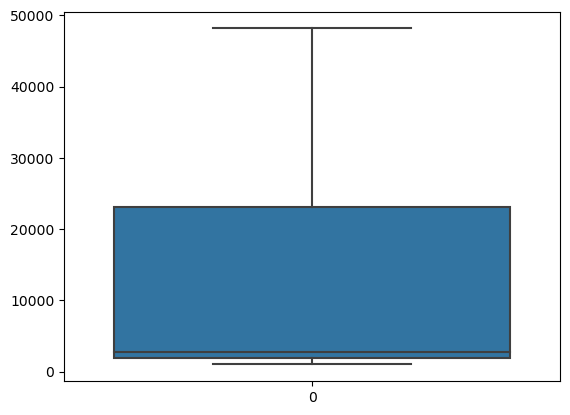

In [56]:
sns.boxplot(Claims_1.claim_amount)

<Axes: >

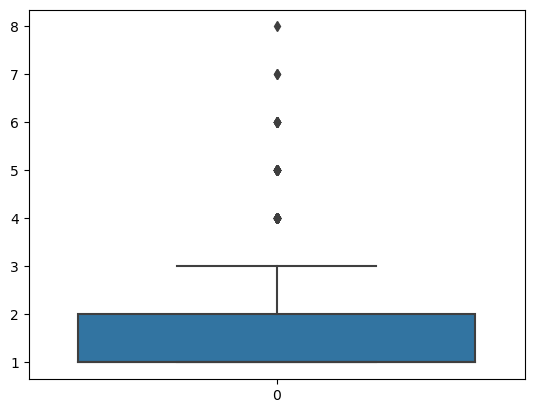

In [57]:
sns.boxplot(Claims_1.total_policy_claims)

In [58]:
Claims_3 = Claims_1.copy()

In [59]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [60]:
Claims_3.apply(outliertreat_IQR)

,fraudulent,incident_cause_Crime,incident_cause_Driver error,incident_cause_Natural causes,incident_cause_Other causes,incident_cause_Other driver error,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,...,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very Low,Claim_group_very High,total_policy_group_High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0.0,0.0,0.0,0.0,-1.5,0.0,1.0,0.0,-1.5,-1.5,...,0.0,0.0,0.0,-1.5,0.0,0.0,1.0,0.0,-29711.25,-0.5
1,0.0,0.0,0.0,0.0,2.5,0.0,1.0,0.0,2.5,2.5,...,0.0,0.0,0.0,2.5,0.0,0.0,1.0,0.0,54686.75,3.5


In [61]:
Claims_3['total_policy_claims'] = Claims_3['total_policy_claims'].clip(lower = -0.5, upper = 3.5)

In [92]:
Claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Claim_binned
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,0,"(0, 10000]"
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,0,"(0, 10000]"
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,1,"(0, 10000]"
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,0,"(0, 10000]"
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,0,"(0, 10000]"


In [93]:
pd.set_option('display.max_columns',None)

In [94]:
Claims_3.head()

,fraudulent,incident_cause_Natural causes,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very Low,Claim_group_very High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,2980.0,1.0
1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,2980.0,3.0
2,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,3369.5,1.0
3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1680.0,1.0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,2680.0,1.0


## Feature Engineering: Correlation Analysis

In [63]:
corr = Claims_3.corrwith(Claims_3['fraudulent']).abs().sort_values(ascending = False)

In [64]:
corr

fraudulent                           1.000000
police_report_Yes                    0.132814
Claim_group_very High                0.126885
claim_type_Injury only               0.097291
Claim_group_Low                      0.087614
total_policy_group_Medium            0.086107
total_policy_group_Low               0.081425
total_policy_claims                  0.076631
police_report_Unknown                0.066492
Claim_group_High                     0.055227
claim_type_Material only             0.048085
Claim_group_Medium                   0.044022
Claim_group_Very Low                 0.042787
police_report_No                     0.037186
claim_type_Material and injury       0.033122
claim_area_Home                      0.025062
claim_area_Auto                      0.025062
incident_cause_Natural causes        0.020827
incident_cause_Other causes          0.019762
incident_cause_Crime                 0.018696
claim_amount                         0.017656
incident_cause_Other driver error 

In [65]:
v = corr[np.abs(corr)>0.03]

In [66]:
v

fraudulent                        1.000000
police_report_Yes                 0.132814
Claim_group_very High             0.126885
claim_type_Injury only            0.097291
Claim_group_Low                   0.087614
total_policy_group_Medium         0.086107
total_policy_group_Low            0.081425
total_policy_claims               0.076631
police_report_Unknown             0.066492
Claim_group_High                  0.055227
claim_type_Material only          0.048085
Claim_group_Medium                0.044022
Claim_group_Very Low              0.042787
police_report_No                  0.037186
claim_type_Material and injury    0.033122
dtype: float64

In [67]:
Claims_3.columns

Index(['fraudulent', 'incident_cause_Crime', 'incident_cause_Driver error',
       'incident_cause_Natural causes', 'incident_cause_Other causes',
       'incident_cause_Other driver error', 'claim_area_Auto',
       'claim_area_Home', 'police_report_No', 'police_report_Unknown',
       'police_report_Yes', 'claim_type_Injury only',
       'claim_type_Material and injury', 'claim_type_Material only',
       'Claim_group_High', 'Claim_group_Low', 'Claim_group_Medium',
       'Claim_group_Very Low', 'Claim_group_very High',
       'total_policy_group_High', 'total_policy_group_Low',
       'total_policy_group_Medium', 'claim_amount', 'total_policy_claims'],
      dtype='object')

In [68]:
Claims_3 = Claims_3[['fraudulent','incident_cause_Natural causes','claim_area_Auto','claim_area_Home', 'police_report_No', 'police_report_Unknown','police_report_Yes', 'claim_type_Injury only','claim_type_Material and injury', 'claim_type_Material only','Claim_group_High', 'Claim_group_Low', 'Claim_group_Medium','Claim_group_Very Low', 'Claim_group_very High','total_policy_group_Low','total_policy_group_Medium','claim_amount','total_policy_claims']]

In [69]:
Claims_3.head()

,fraudulent,incident_cause_Natural causes,claim_area_Auto,claim_area_Home,police_report_No,police_report_Unknown,police_report_Yes,claim_type_Injury only,claim_type_Material and injury,claim_type_Material only,Claim_group_High,Claim_group_Low,Claim_group_Medium,Claim_group_Very Low,Claim_group_very High,total_policy_group_Low,total_policy_group_Medium,claim_amount,total_policy_claims
0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,2980.0,1.0
1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,2980.0,3.0
2,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,3369.5,1.0
3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1680.0,1.0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,2680.0,1.0


## Split train-test data

In [70]:
import sklearn
from sklearn.model_selection import train_test_split

**Importing the train_test_split module from sklearn library to validate the performance of the model.**

In [71]:
x = Claims_3.drop(['fraudulent'], axis = 1)

y = Claims_3['fraudulent']

**Dropping the fraudulent variable as it does not give that much impact to our model.**

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [73]:
x_train.shape

(880, 18)

In [74]:
x_test.shape

(220, 18)

## Building a Naive Bayes Model:

In [78]:
from sklearn.naive_bayes import GaussianNB  # Gaussian distribution/ Normal distribution, so you don't have to do any transformation
gnb = GaussianNB()

# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [79]:
y_train_pred = gnb.predict(x_train)
y_train_pred = pd.Series(y_train_pred)
Model_data_train = pd.DataFrame(y_train)
Model_data_train['y_pred'] = y_train_pred
Model_data_train

,fraudulent,y_pred
900,0,NaN
895,0,NaN
465,0,0.0
422,0,0.0
200,0,0.0
...,...,...
1033,0,NaN
763,0,0.0
835,0,0.0
559,0,0.0


**Predicting the y value for the training dataset.**

In [80]:
pd.crosstab(Model_data_train.fraudulent,Model_data_train.y_pred, margins = True)

y_pred,0.0,1.0,All
fraudulent,,,
0,509,46,555
1,148,16,164
All,657,62,719


In [81]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[645  34]
 [167  34]]

True Positives(TP) =  645

True Negatives(TN) =  34

False Positives(FP) =  34

False Negatives(FN) =  167


(2, 2)

<Axes: >

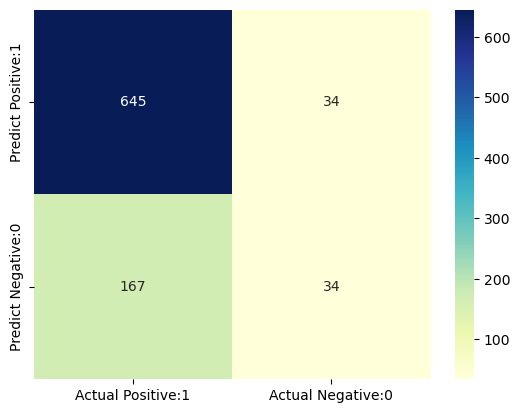

In [82]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87       679
           1       0.50      0.17      0.25       201

    accuracy                           0.77       880
   macro avg       0.65      0.56      0.56       880
weighted avg       0.73      0.77      0.73       880



In [84]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.7716


## Evaluate the model on the test data

In [85]:
y_test_pred = gnb.predict(x_test)
y_test_pred = pd.Series(y_test_pred)
Model_data_test = pd.DataFrame(y_test)
Model_data_test['y_pred'] = y_test_pred
Model_data_test

,fraudulent,y_pred
395,1,NaN
860,0,NaN
477,0,NaN
671,0,NaN
1002,0,NaN
...,...,...
640,0,NaN
605,0,NaN
588,0,NaN
561,1,NaN


In [86]:
pd.crosstab(Model_data_test.fraudulent,Model_data_test.y_pred, margins = True)

y_pred,0.0,1.0,All
fraudulent,,,
0,24,1,25
1,6,2,8
All,30,3,33


In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       167
           1       0.60      0.23      0.33        53

    accuracy                           0.78       220
   macro avg       0.70      0.59      0.60       220
weighted avg       0.75      0.78      0.74       220



In [88]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))

Model accuracy score: 0.7773


**It is not an overfitting model. We have divided the training and testing dataset in 80-20 ratio and we got almost similar training and testing accuracy.**

**Conclusion :** In this project, we set out to improve the accuracy of our model, initially achieving a 73% accuracy rate. By doing some Outlier Treatment and Correlation Analysis the model's accuracy rate has increased but importantly by reintroducing the claim_amount variable into our analysis, we observed a notable increase in accuracy, reaching 77%. This suggests that in this dataset, claim_amount variable plays a significant role in predicting the outcomes of our model.